In [4]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline #to avoid popups of graphs. to have grpahs below the code only in the jupiter notebk


In [7]:
recipes=pd.read_csv("recipes_muffins_cupcakes.csv")
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


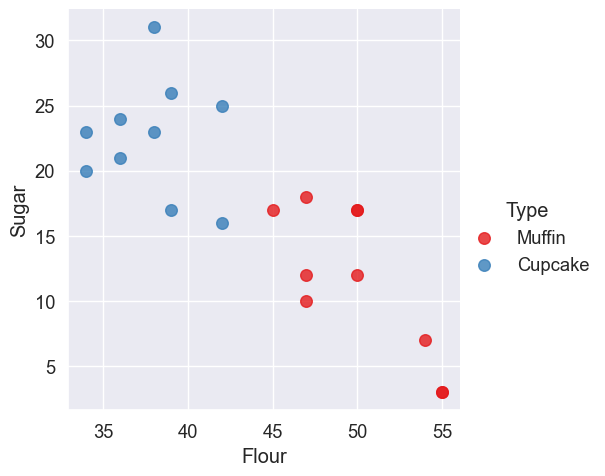

In [9]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70}) #for plotting

In [12]:
type_label=np.where(recipes['Type']=='Muffin',0,1) #agar muffin hai tou 0 warna 1
recipe_features=recipes.columns.values[1:].tolist() #to print names of columns in list
ingredients=recipes[['Flour','Sugar']].values #flour sugar ki values lene keliye
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


You're looking at muffin


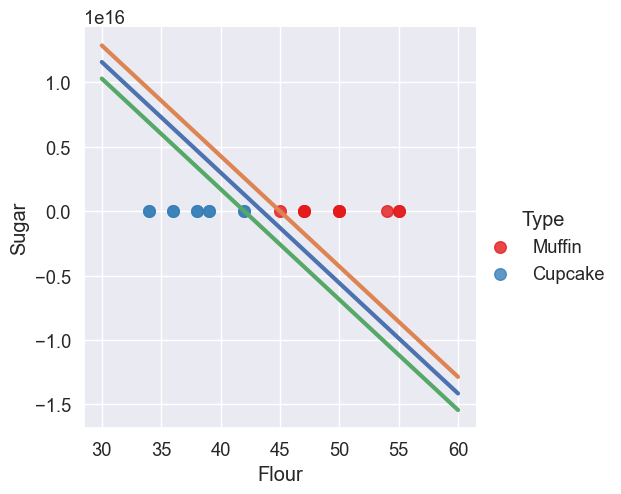

In [25]:
model=svm.SVC(kernel='linear') #SVC for categorizing model based on whether it's Muffin or Cupcake  SVR for regression. linear means one hyperline
model.fit(ingredients,type_label) #hyperline based on ingredients and muffin/cupcake
w=model.coef_[0] #extracts first row
a=-w[0]/w[1] #55,3 w[0]=55 flour w[1]=3 sugar and a is the slope
xx=np.linspace(30,60) #xx is flour evenly spaced out b/w 30 and 60
yy=a*xx-model.intercept_[0]/w[1] #compute y(sugar) for each flour
b=model.support_vectors_[0]
yy_down=a*xx + (b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=a*xx + (b[1]-a*b[0])
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70}) #for plotting
plt.plot(xx,yy,linewidth=3)
plt.plot(xx,yy_down,linewidth=3)
plt.plot(xx,yy_up,linewidth=3)


def muffin_or_cupcake(flour,sugar):
    if(model.predict([[flour,sugar]]))==0:
        print("You're looking at muffin")
    else:
        print("You're looking at a cupcake")

muffin_or_cupcake(55,10)